<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/ProjectPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 2



I will continue to use the error computing functions defined in project part 1 as well as the Taylor series expansion of $\sin x$ centered at $\frac\pi4$

In [3]:
import math

pi = math.pi
sqrt2 = math.sqrt(2)

def absoluteError(estimate, actualValue):
  return actualValue - estimate

def relativeError(estimate, actualValue):
  return absoluteError(estimate, actualValue)/actualValue

def approximateError(previousEstimate, currentEstimate):
  return currentEstimate - previousEstimate

def relativeApproxiamteError(previousEstimate, currentEstimate):
  return approximateError(previousEstimate, currentEstimate)/currentEstimate

def generalTaylorCoefficient(degree):
  return (-1)**(math.floor(degree/2))/(sqrt2*math.factorial(degree))

def taylorPolynomialTerm(degree, input):
  return generalTaylorCoefficient(degree)*(input-pi/4)**degree

def taylorPolynomial(degree, input):
  sum = 0
  for i in range(0, degree+1):
    sum = sum +  taylorPolynomialTerm(i, input)
  return sum



## Derivative Functions

There are three derivative estimation functions that we will define below.

Forward difference is
$$
f'(x_0)\approx \frac{f(x_0+\Delta x)-f(x_0)}{\Delta x}
$$

The backward difference is
$$
f'(x_0)\approx \frac{f(x_0)-f(x_0-\Delta x)}{\Delta x}
$$

The central difference is
$$
f'(x_0)\approx \frac{f(x_0+\Delta x)-f(x_0-\Delta x)}{2\Delta x}
$$

I'll also write the definition for the finite difference of the second order derivative.
$$
f''(x_0)\approx \frac{f(x_0+2\Delta x)-2f(x_0+\Delta x)+f(x_0)}{\left(\Delta x\right)^2}
$$

In [9]:
def forwardDifference(function,initial,stepSize):
  return (function(initial+stepSize)-function(initial))/stepSize

def backwardDifference(function,initial,stepSize):
  return (function(initial)-function(initial-stepSize))/stepSize

def centralDifference(function,initial,stepSize):
  return (function(initial+stepSize)-function(initial-stepSize))/(2*stepSize)

def finiteDifference(function,initial,stepSize):
  return (function(initial+2*stepSize)-2*function(initial+stepSize)+function(initial))/stepSize**2

In [17]:
stepSizes = [1, .1 , .01 , .001,.0001]
forward = [forwardDifference(math.sin, pi/4,step) for step in stepSizes]
backward = [backwardDifference(math.sin, pi/4,step) for step in stepSizes]
central = [centralDifference(math.sin, pi/4,step) for step in stepSizes]
finite = [finiteDifference(math.sin, pi/4,step) for step in stepSizes]


actual = 1/sqrt2

absoluteforward = [absoluteError(estimate,actual) for estimate in forward]
relativeforward = [relativeError(estimate, actual) for estimate in forward]

absolutebackward = [absoluteError(estimate,actual) for estimate in backward]
relativebackward = [relativeError(estimate, actual) for estimate in backward]

absolutecentral = [absoluteError(estimate,actual) for estimate in central]
relativecentral = [relativeError(estimate, actual) for estimate in central]

actualSecond = -1/sqrt2 

absolutefinite = [absoluteError(estimate,actualSecond) for estimate in finite]
relativefinite = [relativeError(estimate, actualSecond) for estimate in finite]

In order to make a beautiful table I am going to use the package plotly.  It is useful for creating visualizations.

In [18]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
                header=dict(values=['Step Size', 'Forward Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [stepSizes,forward,absoluteforward,relativeforward]))
                     ])
fig.show()

In [19]:
fig = go.Figure(data=[go.Table(
                header=dict(values=['Step Size', 'Backward Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [stepSizes,backward,absolutebackward,relativebackward]))
                     ])
fig.show()

In [20]:
fig = go.Figure(data=[go.Table(
                header=dict(values=['Step Size', 'Central Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [stepSizes,central,absolutecentral,relativecentral]))
                     ])
fig.show()

In [21]:
fig = go.Figure(data=[go.Table(
                header=dict(values=['Step Size', 'Finite Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [stepSizes,finite,absolutefinite,relativefinite]))
                     ])
fig.show()

I was clearly not too worried about my step sizes but I do note a few interesting things here:


*   Centeral Difference is the best for the estimation of the first derivative
*   The forward is always an over estimate
*   The backward is always an under estimate
*   The two previous items are most likely due to the fact that my function is increasing at the point of interest (and I don't escape the interval of increasing)
*   There is no other approximation to compare the finite difference to










Lastly to graph the function and the 5th order Taylor approximation I will utilize yet another couple of packages.  Numpy is very powerful even though I am just using it here to generate $x$ values and matplotlib is a library for graphing.

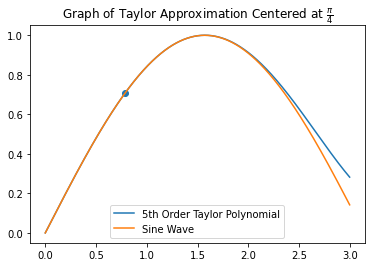

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange( 0,3,.001)
plt.scatter(pi/4,1/sqrt2)
plt.plot(x,taylorPolynomial(5,x))
plt.plot(x, np.sin(x))
plt.title('Graph of Taylor Approximation Centered at ' r'$\frac{\pi}{4}$')
plt.legend(['5th Order Taylor Polynomial', 'Sine Wave'])

plt.show()


I've played around with the $x$ values until I was satisfied with the window size.  I wanted to make sure my center was included, the 'wave' was visisble, and there was some deviation from the actual value.  I am going to try doing the 20th order to see where that one starts to deviate from the graph.

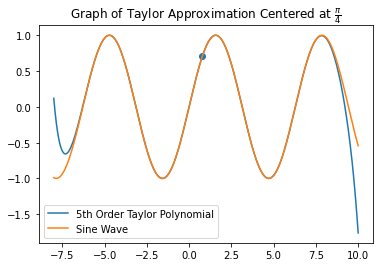

In [ ]:
x = np.arange( -8,10,.001)
plt.scatter(pi/4,1/sqrt2)
plt.plot(x,taylorPolynomial(20,x))
plt.plot(x, np.sin(x))
plt.title('Graph of Taylor Approximation Centered at ' r'$\frac{\pi}{4}$')
plt.legend(['20th Order Taylor Polynomial', 'Sine Wave'])

plt.show()